In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lab3-inceptionv3/test_images_inceptionv3.csv
/kaggle/input/lab3-inceptionv3/train_images_inceptionv3.csv
/kaggle/input/lab3-vgg16/test_images_vgg16.csv
/kaggle/input/lab3-vgg16/train_images_vgg16.csv
/kaggle/input/lab3-resnet50/train_images_resnet50.csv
/kaggle/input/lab3-resnet50/test_images_resnet50.csv
/kaggle/input/lab3-efficientnet/test_images_efficient_net.csv
/kaggle/input/lab3-efficientnet/train_images_efficent_net.csv
/kaggle/input/lab36-vgg19/train_images_vgg19.csv
/kaggle/input/lab36-vgg19/test_images_vgg19.csv


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from keras.models import Sequential
from keras.layers import Dense

# Use embeddings from pretrained models

## VGG 16

In [2]:
train_vgg16 = pd.read_csv('/kaggle/input/lab3-vgg16/train_images_vgg16.csv')
test_vgg16 = pd.read_csv('/kaggle/input/lab3-vgg16/test_images_vgg16.csv')

In [3]:
train_vgg16.head(2)

,image_name,target,0,1,2,3,4,5,6,7,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,/kaggle/input/real-and-fake-face-detection/rea...,0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,57.007713,0.0,0.0,0.000000,0.000000,63.855167
1,/kaggle/input/lab3-datasets/russel_crowe_image...,1,0.0,52.81078,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.627598,0.0,0.0,0.000000,0.0,0.0,0.079455,10.876463,0.000000


### SVC

In [6]:
svc = SVC(random_state=42, probability=True)

In [8]:
## handle missing values
train_vgg16[train_vgg16.columns[2:]] = train_vgg16[train_vgg16.columns[2:]].fillna(0)
test_vgg16[test_vgg16.columns[2:]] = test_vgg16[test_vgg16.columns[2:]].fillna(0)

In [9]:
%%time
svc.fit(train_vgg16[train_vgg16.columns[2:]], train_vgg16['target'])

CPU times: user 47.7 s, sys: 69.2 ms, total: 47.7 s
Wall time: 48 s


SVC(probability=True, random_state=42)

### Dense Net

In [10]:
model_raw_vgg16 = Sequential()
model_raw_vgg16.add(Dense(12, input_dim=len(train_vgg16.columns[2:]), activation='relu'))
model_raw_vgg16.add(Dense(8, activation='relu'))
model_raw_vgg16.add(Dense(1, activation='sigmoid'))

In [11]:
model_raw_vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                98316     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 98,429
Trainable params: 98,429
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_raw_vgg16.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [13]:
%%time
model_raw_vgg16.fit(train_vgg16[train_vgg16.columns[2:]], train_vgg16['target'],
                    epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 2ms/step - loss: 0.9944 - accuracy: 0.7570 - auc: 0.4482
Epoch 2/150
97/97 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7859 - auc: 0.6098
Epoch 3/150
97/97 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7870 - auc: 0.7048
Epoch 4/150
97/97 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7880 - auc: 0.7801
Epoch 5/150
97/97 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.7880 - auc: 0.7951
Epoch 6/150
97/97 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7880 - auc: 0.8234
Epoch 7/150
97/97 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7880 - auc: 0.8398
Epoch 8/150
97/97 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.7880 - auc: 0.8234
Epoch 9/150
97/97 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.78

97/97 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9731 - auc: 0.9849
Epoch 144/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.9731 - auc: 0.9870
Epoch 145/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9731 - auc: 0.9846
Epoch 146/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9731 - auc: 0.9856
Epoch 147/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0780 - accuracy: 0.9731 - auc: 0.9844
Epoch 148/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9731 - auc: 0.9870
Epoch 149/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9731 - auc: 0.9850
Epoch 150/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9731 - auc: 0.9828
CPU times: user 1min 3s, sys: 8.84 s, total: 1min 12s
Wall time: 38.5 s


#### Metrics per iteration for Dense Net

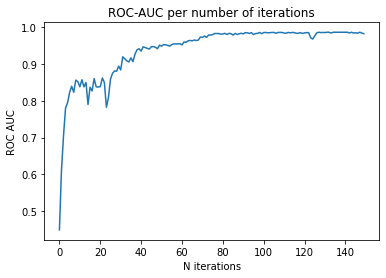

In [14]:
plt.plot(model_raw_vgg16.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

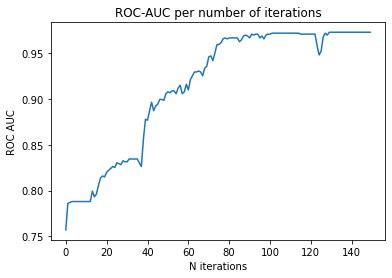

In [15]:
plt.plot(model_raw_vgg16.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [16]:
log_reg = LogisticRegression(random_state=42)

In [17]:
%%time
log_reg.fit(train_vgg16[train_vgg16.columns[2:]], train_vgg16['target'])

CPU times: user 3.71 s, sys: 65 ms, total: 3.78 s
Wall time: 2.03 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [18]:
gbr = GradientBoostingClassifier(random_state=42)

In [19]:
%%time
gbr.fit(train_vgg16[train_vgg16.columns[2:]], train_vgg16['target'])

CPU times: user 22.4 s, sys: 6.23 ms, total: 22.4 s
Wall time: 22.5 s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [20]:
rf = RandomForestClassifier(random_state=42)

In [21]:
%%time
rf.fit(train_vgg16[train_vgg16.columns[2:]], train_vgg16['target'])

CPU times: user 1.34 s, sys: 0 ns, total: 1.34 s
Wall time: 1.35 s


RandomForestClassifier(random_state=42)

## VGG 19

In [22]:
train_vgg19 = pd.read_csv('/kaggle/input/lab36-vgg19/train_images_vgg19.csv')
test_vgg19 = pd.read_csv('/kaggle/input/lab36-vgg19/test_images_vgg19.csv')

In [23]:
train_vgg19.head(2)

,image_name,target,0,1,2,3,4,5,6,7,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,/kaggle/input/real-and-fake-face-detection/rea...,0,0.0,0.0,0.0,0.0,7.433889,0.0,0.811353,0.0,...,0.0,16.343136,0.0,0.0,20.089308,0.0,0.000000,0.0,0.000000,37.92097
1,/kaggle/input/lab3-datasets/russel_crowe_image...,1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.119959,0.0,0.0,0.000000,0.0,0.219941,0.0,0.106321,0.00000


### SVC

In [24]:
svc_vgg19 = SVC(random_state=42, probability=True)

In [25]:
## handle missing values
train_vgg19[train_vgg19.columns[2:]] = train_vgg19[train_vgg19.columns[2:]].fillna(0)
test_vgg19[test_vgg19.columns[2:]] = test_vgg19[test_vgg19.columns[2:]].fillna(0)

In [26]:
%%time
svc_vgg19.fit(train_vgg19[train_vgg19.columns[2:]], train_vgg19['target'])

CPU times: user 48.5 s, sys: 77 ms, total: 48.6 s
Wall time: 48.9 s


SVC(probability=True, random_state=42)

### Dense Net

In [27]:
model_raw_vgg19 = Sequential()
model_raw_vgg19.add(Dense(12, input_dim=len(train_vgg19.columns[2:]), activation='relu'))
model_raw_vgg19.add(Dense(8, activation='relu'))
model_raw_vgg19.add(Dense(1, activation='sigmoid'))

In [28]:
model_raw_vgg19.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                98316     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 98,429
Trainable params: 98,429
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_raw_vgg19.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [30]:
%%time
model_raw_vgg19.fit(train_vgg19[train_vgg19.columns[2:]], train_vgg19['target'],
                    epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 3ms/step - loss: 0.9589 - accuracy: 0.7394 - auc: 0.3980
Epoch 2/150
97/97 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.7921 - auc: 0.5143
Epoch 3/150
97/97 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.8159 - auc: 0.6246
Epoch 4/150
97/97 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.8459 - auc: 0.7773
Epoch 5/150
97/97 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8645 - auc: 0.8546
Epoch 6/150
97/97 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8666 - auc: 0.9092
Epoch 7/150
97/97 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.8800 - auc: 0.9347
Epoch 8/150
97/97 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8893 - auc: 0.9643
Epoch 9/150
97/97 [==============================] - 0s 3ms/step - loss: 0.2309 - accuracy: 0.89

97/97 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9866 - auc: 0.9998
Epoch 144/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9866 - auc: 0.9998
Epoch 145/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9866 - auc: 0.9998
Epoch 146/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9866 - auc: 0.9999
Epoch 147/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9866 - auc: 0.9998
Epoch 148/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9866 - auc: 0.9998
Epoch 149/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9897 - auc: 0.9998
Epoch 150/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9959 - auc: 0.9998
CPU times: user 1min 7s, sys: 8.95 s, total: 1min 16s
Wall time: 39.7 s


#### Metrics per iteration for Dense Net

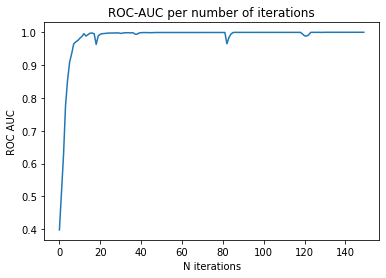

In [31]:
plt.plot(model_raw_vgg19.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

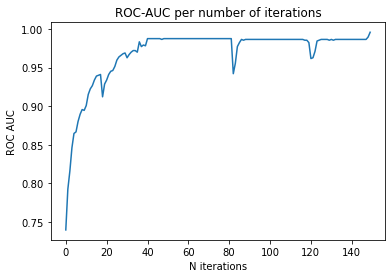

In [32]:
plt.plot(model_raw_vgg19.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [33]:
log_reg_vgg19 = LogisticRegression(random_state=42)

In [34]:
%%time
log_reg_vgg19.fit(train_vgg19[train_vgg19.columns[2:]], train_vgg19['target'])

CPU times: user 3.81 s, sys: 55.3 ms, total: 3.86 s
Wall time: 2.05 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [35]:
gbr_vgg19 = GradientBoostingClassifier(random_state=42)

In [36]:
%%time
gbr_vgg19.fit(train_vgg19[train_vgg19.columns[2:]], train_vgg19['target'])

CPU times: user 23.6 s, sys: 22.9 ms, total: 23.7 s
Wall time: 23.8 s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [37]:
rf_vgg19 = RandomForestClassifier(random_state=42)

In [184]:
%%time
rf_vgg19.fit(train_vgg19[train_vgg19.columns[2:]], train_vgg19['target'])

CPU times: user 1.32 s, sys: 2.24 ms, total: 1.32 s
Wall time: 1.33 s


RandomForestClassifier(random_state=42)

## Resnet50

In [38]:
train_resnet50 = pd.read_csv('/kaggle/input/lab3-resnet50/train_images_resnet50.csv')
test_resnet50 = pd.read_csv('/kaggle/input/lab3-resnet50/test_images_resnet50.csv')

In [39]:
train_resnet50.head(2)

,image_name,target,0,1,2,3,4,5,6,7,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
0,/kaggle/input/real-and-fake-face-detection/rea...,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,3.044163,0.0,0.0,25.067244,0.543142,0.377945,0.000000,0.0,0.000000,1.006015
1,/kaggle/input/lab3-datasets/russel_crowe_image...,1,0.0,0.0,0.288248,1.581888,0.0,0.0,0.0,0.657782,...,0.000000,0.0,0.0,0.030099,0.000000,0.000000,1.821778,0.0,0.744289,0.519091


### SVC

In [40]:
svc_resnet50 = SVC(random_state=42, probability=True)

In [41]:
## handle missing values
train_resnet50[train_resnet50.columns[2:]] = train_resnet50[train_resnet50.columns[2:]].fillna(0)
test_resnet50[test_resnet50.columns[2:]] = test_resnet50[test_resnet50.columns[2:]].fillna(0)

In [42]:
%%time
svc_resnet50.fit(train_resnet50[train_resnet50.columns[2:]], train_resnet50['target'])

CPU times: user 3min 11s, sys: 263 ms, total: 3min 12s
Wall time: 3min 13s


SVC(probability=True, random_state=42)

### Dense Net

In [43]:
model_raw_resnet50 = Sequential()
model_raw_resnet50.add(Dense(12, input_dim=len(train_resnet50.columns[2:]), activation='relu'))
model_raw_resnet50.add(Dense(8, activation='relu'))
model_raw_resnet50.add(Dense(1, activation='sigmoid'))

In [44]:
model_raw_resnet50.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                393228    
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 393,341
Trainable params: 393,341
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_raw_resnet50.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [46]:
%%time
model_raw_resnet50.fit(train_resnet50[train_resnet50.columns[2:]], train_resnet50['target'],
                    epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 5ms/step - loss: 0.8113 - accuracy: 0.7642 - auc: 0.3714
Epoch 2/150
97/97 [==============================] - 0s 5ms/step - loss: 0.5221 - accuracy: 0.7849 - auc: 0.6608
Epoch 3/150
97/97 [==============================] - 1s 5ms/step - loss: 0.4490 - accuracy: 0.7849 - auc: 0.8239
Epoch 4/150
97/97 [==============================] - 0s 5ms/step - loss: 0.3678 - accuracy: 0.7828 - auc: 0.9247
Epoch 5/150
97/97 [==============================] - 0s 5ms/step - loss: 0.3265 - accuracy: 0.7828 - auc: 0.9318
Epoch 6/150
97/97 [==============================] - 1s 5ms/step - loss: 0.2733 - accuracy: 0.7828 - auc: 0.9650
Epoch 7/150
97/97 [==============================] - 0s 5ms/step - loss: 0.2410 - accuracy: 0.7828 - auc: 0.9679
Epoch 8/150
97/97 [==============================] - 1s 5ms/step - loss: 0.2249 - accuracy: 0.9214 - auc: 0.9628
Epoch 9/150
97/97 [==============================] - 0s 5ms/step - loss: 0.2189 - accuracy: 0.95

97/97 [==============================] - 1s 7ms/step - loss: 0.0077 - accuracy: 0.9990 - auc: 0.9993
Epoch 144/150
97/97 [==============================] - 1s 7ms/step - loss: 0.0077 - accuracy: 0.9990 - auc: 0.9993
Epoch 145/150
97/97 [==============================] - 1s 6ms/step - loss: 0.0076 - accuracy: 0.9990 - auc: 0.9991
Epoch 146/150
97/97 [==============================] - 1s 5ms/step - loss: 0.0076 - accuracy: 0.9990 - auc: 0.9993
Epoch 147/150
97/97 [==============================] - 1s 6ms/step - loss: 0.0076 - accuracy: 0.9990 - auc: 0.9993
Epoch 148/150
97/97 [==============================] - 1s 6ms/step - loss: 0.0075 - accuracy: 0.9990 - auc: 0.9993
Epoch 149/150
97/97 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 0.9990 - auc: 0.9993
Epoch 150/150
97/97 [==============================] - 1s 6ms/step - loss: 0.0075 - accuracy: 0.9990 - auc: 0.9993
CPU times: user 2min 34s, sys: 12.3 s, total: 2min 46s
Wall time: 1min 9s


#### Metrics per iteration for Dense Net

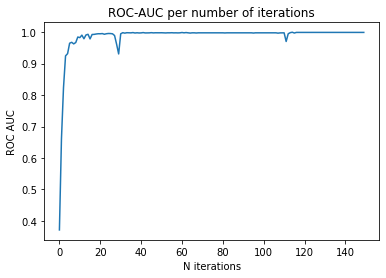

In [47]:
plt.plot(model_raw_resnet50.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

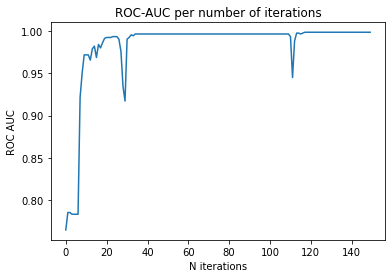

In [48]:
plt.plot(model_raw_resnet50.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [49]:
log_reg_resnet50 = LogisticRegression(random_state=42)

In [50]:
%%time
log_reg_resnet50.fit(train_resnet50[train_resnet50.columns[2:]], train_resnet50['target'])

CPU times: user 10 s, sys: 181 ms, total: 10.2 s
Wall time: 5.58 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [51]:
gbr_resnet50 = GradientBoostingClassifier(random_state=42)

In [52]:
%%time
gbr_resnet50.fit(train_resnet50[train_resnet50.columns[2:]], train_resnet50['target'])

CPU times: user 2min 59s, sys: 239 ms, total: 2min 59s
Wall time: 3min


GradientBoostingClassifier(random_state=42)

### RandomForest

In [53]:
rf_resnet50 = RandomForestClassifier(random_state=42)

In [54]:
%%time
rf_resnet50.fit(train_resnet50[train_resnet50.columns[2:]], train_resnet50['target'])

CPU times: user 3.86 s, sys: 0 ns, total: 3.86 s
Wall time: 3.88 s


RandomForestClassifier(random_state=42)

## EfficientNet

In [55]:
train_efficient_net = pd.read_csv('/kaggle/input/lab3-efficientnet/train_images_efficent_net.csv')
test_efficient_net = pd.read_csv('/kaggle/input/lab3-efficientnet/test_images_efficient_net.csv')

In [56]:
train_efficient_net.head(2)

,image_name,target,0,1,2,3,4,5,6,7,...,20470,20471,20472,20473,20474,20475,20476,20477,20478,20479
0,/kaggle/input/real-and-fake-face-detection/rea...,0,-0.108807,-0.063203,-0.151446,-0.258653,-0.14321,0.520563,-0.157612,-0.166628,...,-0.247935,-0.238898,-0.220627,-0.215591,-0.273874,-0.122365,-0.14342,-0.003733,-0.045659,0.423481
1,/kaggle/input/lab3-datasets/russel_crowe_image...,1,-0.224324,-0.275059,-0.275332,-0.273451,-0.18134,-0.120140,-0.275968,-0.053298,...,0.857371,-0.248763,3.022597,0.175123,-0.212562,-0.276527,-0.21443,-0.125209,-0.057769,-0.126134


### SVC

In [57]:
svc_efficient_net = SVC(random_state=42, probability=True)

In [58]:
## handle missing values
train_efficient_net[train_efficient_net.columns[2:]] = train_efficient_net[train_efficient_net.columns[2:]].fillna(0)
test_efficient_net[test_efficient_net.columns[2:]] = test_efficient_net[test_efficient_net.columns[2:]].fillna(0)

In [59]:
%%time
svc_efficient_net.fit(train_efficient_net[train_efficient_net.columns[2:]], 
                      train_efficient_net['target'])

CPU times: user 1min 19s, sys: 276 ms, total: 1min 20s
Wall time: 1min 20s


SVC(probability=True, random_state=42)

### Dense Net

In [60]:
model_raw_efficient_net = Sequential()
model_raw_efficient_net.add(Dense(12, input_dim=len(train_efficient_net.columns[2:]),
                                  activation='relu'))
model_raw_efficient_net.add(Dense(8, activation='relu'))
model_raw_efficient_net.add(Dense(1, activation='sigmoid'))

In [61]:
model_raw_efficient_net.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                245772    
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 245,885
Trainable params: 245,885
Non-trainable params: 0
_________________________________________________________________


In [62]:
model_raw_efficient_net.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [63]:
%%time
model_raw_efficient_net.fit(train_efficient_net[train_efficient_net.columns[2:]],
                            train_efficient_net['target'],
                            epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 3ms/step - loss: 0.1610 - accuracy: 0.9390 - auc: 0.9743
Epoch 2/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9897 - auc: 0.9990
Epoch 3/150
97/97 [==============================] - 0s 4ms/step - loss: 0.0158 - accuracy: 0.9959 - auc: 0.9998
Epoch 4/150
97/97 [==============================] - 0s 4ms/step - loss: 6.7411e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 5/150
97/97 [==============================] - 0s 4ms/step - loss: 3.0488e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 6/150
97/97 [==============================] - 0s 4ms/step - loss: 2.2958e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 7/150
97/97 [==============================] - 0s 4ms/step - loss: 1.8532e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 8/150
97/97 [==============================] - 0s 4ms/step - loss: 1.5359e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 9/150
97/97 [==============================] - 0s 4ms/step - loss: 1.2

97/97 [==============================] - 0s 4ms/step - loss: 3.5848e-08 - accuracy: 1.0000 - auc: 1.0000
Epoch 140/150
97/97 [==============================] - 0s 4ms/step - loss: 3.4280e-08 - accuracy: 1.0000 - auc: 1.0000
Epoch 141/150
97/97 [==============================] - 0s 4ms/step - loss: 3.2617e-08 - accuracy: 1.0000 - auc: 1.0000
Epoch 142/150
97/97 [==============================] - 0s 4ms/step - loss: 3.0963e-08 - accuracy: 1.0000 - auc: 1.0000
Epoch 143/150
97/97 [==============================] - 0s 5ms/step - loss: 2.9399e-08 - accuracy: 1.0000 - auc: 1.0000
Epoch 144/150
97/97 [==============================] - 0s 5ms/step - loss: 2.7873e-08 - accuracy: 1.0000 - auc: 1.0000
Epoch 145/150
97/97 [==============================] - 0s 3ms/step - loss: 2.6606e-08 - accuracy: 1.0000 - auc: 1.0000
Epoch 146/150
97/97 [==============================] - 0s 4ms/step - loss: 2.5193e-08 - accuracy: 1.0000 - auc: 1.0000
Epoch 147/150
97/97 [==============================] - 0s 4ms/

#### Metrics per iteration for Dense Net

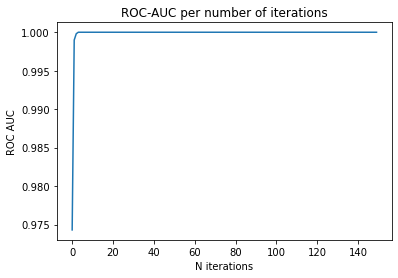

In [64]:
plt.plot(model_raw_efficient_net.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

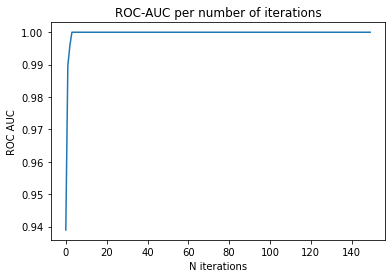

In [65]:
plt.plot(model_raw_efficient_net.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [66]:
log_reg_efficient_net = LogisticRegression(random_state=42)

In [67]:
%%time
log_reg_efficient_net.fit(train_efficient_net[train_efficient_net.columns[2:]], 
                          train_efficient_net['target'])

CPU times: user 4.36 s, sys: 326 ms, total: 4.69 s
Wall time: 2.74 s


LogisticRegression(random_state=42)

### GradientBoositng

In [68]:
gbr_efficient_net = GradientBoostingClassifier(random_state=42)

In [69]:
%%time
gbr_efficient_net.fit(train_efficient_net[train_efficient_net.columns[2:]],
                      train_efficient_net['target'])

CPU times: user 9min 9s, sys: 60.7 ms, total: 9min 9s
Wall time: 9min 12s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [70]:
rf_efficient_net = RandomForestClassifier(random_state=42)

In [71]:
%%time
rf_efficient_net.fit(train_efficient_net[train_efficient_net.columns[2:]],
                     train_efficient_net['target'])

CPU times: user 8.85 s, sys: 0 ns, total: 8.85 s
Wall time: 8.93 s


RandomForestClassifier(random_state=42)

## InceptionV3

In [72]:
train_inceptionv3 = pd.read_csv('/kaggle/input/lab3-inceptionv3/train_images_inceptionv3.csv')
test_inceptionv3 = pd.read_csv('/kaggle/input/lab3-inceptionv3/test_images_inceptionv3.csv')

In [73]:
train_inceptionv3.head(2)

,image_name,target,0,1,2,3,4,5,6,7,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,/kaggle/input/real-and-fake-face-detection/rea...,0,0.000000,0.171707,0.908664,0.216517,0.000000,0.587665,0.000000,0.930312,...,0.371986,0.0,0.000000,3.292775,0.0,1.843987,0.0,0.447838,3.567119,0.235087
1,/kaggle/input/lab3-datasets/russel_crowe_image...,1,0.826839,1.426643,3.316109,0.000000,1.662804,0.319995,0.603856,6.109331,...,0.729552,0.0,3.778265,1.857516,0.0,1.443561,0.0,0.000000,1.693114,1.821976


### SVC

In [74]:
svc_inceptionv3 = SVC(random_state=42, probability=True)

In [75]:
## handle missing values
train_inceptionv3[train_inceptionv3.columns[2:]] = train_inceptionv3[train_inceptionv3.columns[2:]].fillna(0)
test_inceptionv3[test_inceptionv3.columns[2:]] = test_inceptionv3[test_inceptionv3.columns[2:]].fillna(0)

In [195]:
%%time
svc_inceptionv3.fit(train_inceptionv3[train_inceptionv3.columns[2:]], 
                      train_inceptionv3['target'])

CPU times: user 37 s, sys: 50.1 ms, total: 37 s
Wall time: 37.5 s


SVC(probability=True, random_state=42)

### Dense Net

In [77]:
model_raw_inceptionv3 = Sequential()
model_raw_inceptionv3.add(Dense(12, input_dim=len(train_inceptionv3.columns[2:]),
                                  activation='relu'))
model_raw_inceptionv3.add(Dense(8, activation='relu'))
model_raw_inceptionv3.add(Dense(1, activation='sigmoid'))

In [78]:
model_raw_inceptionv3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                98316     
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 98,429
Trainable params: 98,429
Non-trainable params: 0
_________________________________________________________________


In [79]:
model_raw_inceptionv3.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [80]:
%%time
model_raw_inceptionv3.fit(train_inceptionv3[train_inceptionv3.columns[2:]],
                            train_inceptionv3['target'],
                            epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 3ms/step - loss: 0.2751 - accuracy: 0.8966 - auc: 0.9119
Epoch 2/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9669 - auc: 0.9912
Epoch 3/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9772 - auc: 0.9962
Epoch 4/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9897 - auc: 0.9993
Epoch 5/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9969 - auc: 1.0000
Epoch 6/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9938 - auc: 0.9999
Epoch 7/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - auc: 1.0000
Epoch 8/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - auc: 1.0000
Epoch 9/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.00

97/97 [==============================] - 0s 3ms/step - loss: 2.7518e-07 - accuracy: 1.0000 - auc: 1.0000
Epoch 140/150
97/97 [==============================] - 0s 2ms/step - loss: 2.5961e-07 - accuracy: 1.0000 - auc: 1.0000
Epoch 141/150
97/97 [==============================] - 0s 3ms/step - loss: 2.4651e-07 - accuracy: 1.0000 - auc: 1.0000
Epoch 142/150
97/97 [==============================] - 0s 3ms/step - loss: 2.3322e-07 - accuracy: 1.0000 - auc: 1.0000
Epoch 143/150
97/97 [==============================] - 0s 2ms/step - loss: 2.2035e-07 - accuracy: 1.0000 - auc: 1.0000
Epoch 144/150
97/97 [==============================] - 0s 2ms/step - loss: 2.1246e-07 - accuracy: 1.0000 - auc: 1.0000
Epoch 145/150
97/97 [==============================] - 0s 2ms/step - loss: 1.9726e-07 - accuracy: 1.0000 - auc: 1.0000
Epoch 146/150
97/97 [==============================] - 0s 2ms/step - loss: 1.9228e-07 - accuracy: 1.0000 - auc: 1.0000
Epoch 147/150
97/97 [==============================] - 0s 2ms/

#### Metrics per iteration for Dense Net

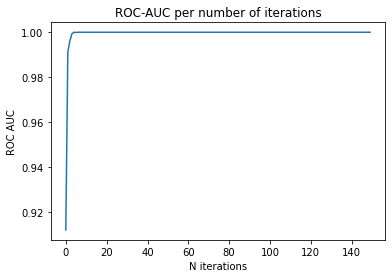

In [81]:
plt.plot(model_raw_inceptionv3.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

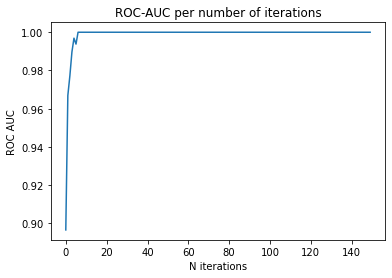

In [82]:
plt.plot(model_raw_inceptionv3.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [83]:
log_reg_inceptionv3 = LogisticRegression(random_state=42)

In [84]:
%%time
log_reg_inceptionv3.fit(train_inceptionv3[train_inceptionv3.columns[2:]], 
                          train_inceptionv3['target'])

CPU times: user 1.89 s, sys: 54.6 ms, total: 1.94 s
Wall time: 1.08 s


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [85]:
gbr_inceptionv3 = GradientBoostingClassifier(random_state=42)

In [86]:
%%time
gbr_inceptionv3.fit(train_inceptionv3[train_inceptionv3.columns[2:]],
                      train_inceptionv3['target'])

CPU times: user 2min 22s, sys: 7.66 ms, total: 2min 22s
Wall time: 2min 23s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [87]:
rf_inceptionv3 = RandomForestClassifier(random_state=42)

In [88]:
%%time
rf_inceptionv3.fit(train_inceptionv3[train_inceptionv3.columns[2:]],
                     train_inceptionv3['target'])

CPU times: user 3.83 s, sys: 0 ns, total: 3.83 s
Wall time: 3.87 s


RandomForestClassifier(random_state=42)

# Embeddings + PCA

In [89]:
pca_vgg16 = PCA(n_components=500, random_state=42)
pca_vgg19 = PCA(n_components=500, random_state=42)
pca_resnet50 = PCA(n_components=500, random_state=42)
pca_efficient_net = PCA(n_components=500, random_state=42)
pca_inceptionv3 = PCA(n_components=500, random_state=42)

In [90]:
train_vgg16_transformed = pca_vgg16.fit_transform(train_vgg16[train_vgg16.columns[2:]])
test_vgg16_transformed = pca_vgg16.transform(test_vgg16[test_vgg16.columns[2:]])

In [91]:
train_vgg19_transformed = pca_vgg19.fit_transform(train_vgg19[train_vgg19.columns[2:]])
test_vgg19_transformed = pca_vgg19.transform(test_vgg19[test_vgg19.columns[2:]])

In [92]:
train_resnet50_transformed = pca_resnet50.fit_transform(train_resnet50[train_resnet50.columns[2:]])
test_resnet50_transformed = pca_resnet50.transform(test_resnet50[test_resnet50.columns[2:]])

In [93]:
train_efficient_net_transformed = pca_efficient_net.fit_transform(train_efficient_net[train_efficient_net.columns[2:]])
test_efficient_net_transformed = pca_efficient_net.transform(test_efficient_net[test_efficient_net.columns[2:]])

In [94]:
train_inceptionv3_transformed = pca_inceptionv3.fit_transform(train_inceptionv3[train_inceptionv3.columns[2:]])
test_inceptionv3_transformed = pca_inceptionv3.transform(test_inceptionv3[test_inceptionv3.columns[2:]])

## VGG16 + PCA

### SVC

In [96]:
svc_vgg16_transformed = SVC(random_state=42, probability=True)

In [98]:
%%time
svc_vgg16_transformed.fit(train_vgg16_transformed, train_vgg16['target'])

CPU times: user 2.64 s, sys: 3.89 ms, total: 2.64 s
Wall time: 2.66 s


SVC(probability=True, random_state=42)

### Dense Net

In [99]:
model_raw_vgg16_transformed = Sequential()
model_raw_vgg16_transformed.add(Dense(12, input_dim=500,
                                  activation='relu'))
model_raw_vgg16_transformed.add(Dense(8, activation='relu'))
model_raw_vgg16_transformed.add(Dense(1, activation='sigmoid'))

In [100]:
model_raw_vgg16_transformed.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                6012      
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 6,125
Trainable params: 6,125
Non-trainable params: 0
_________________________________________________________________


In [101]:
model_raw_vgg16_transformed.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [102]:
%%time
model_raw_vgg16_transformed.fit(train_vgg16_transformed,
                            train_vgg16['target'],
                            epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 2ms/step - loss: 4.2428 - accuracy: 0.6949 - auc: 0.4917
Epoch 2/150
97/97 [==============================] - 0s 2ms/step - loss: 1.2176 - accuracy: 0.8170 - auc: 0.7798
Epoch 3/150
97/97 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.8728 - auc: 0.8921
Epoch 4/150
97/97 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.9131 - auc: 0.9464
Epoch 5/150
97/97 [==============================] - 0s 1ms/step - loss: 0.1866 - accuracy: 0.9235 - auc: 0.9678
Epoch 6/150
97/97 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9380 - auc: 0.9800
Epoch 7/150
97/97 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9473 - auc: 0.9864
Epoch 8/150
97/97 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9535 - auc: 0.9878
Epoch 9/150
97/97 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.96

97/97 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - auc: 1.0000
Epoch 144/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - auc: 1.0000
Epoch 145/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - auc: 1.0000
Epoch 146/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - auc: 1.0000
Epoch 147/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - auc: 1.0000
Epoch 148/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - auc: 1.0000
Epoch 149/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - auc: 1.0000
Epoch 150/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - auc: 1.0000
CPU times: user 41.2 s, sys: 5.8 s, total: 47 s
Wall time: 25.5 s


#### Metrics per iteration for Dense Net

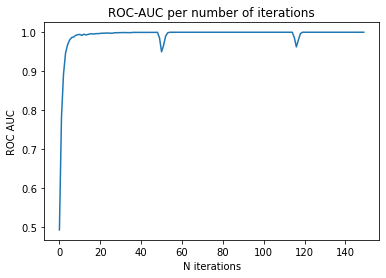

In [103]:
plt.plot(model_raw_vgg16_transformed.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

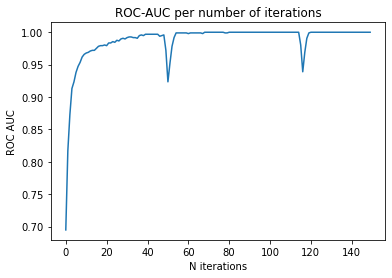

In [104]:
plt.plot(model_raw_vgg16_transformed.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [105]:
log_reg_vgg16_transformed = LogisticRegression(random_state=42)

In [106]:
%%time
log_reg_vgg16_transformed.fit(train_vgg16_transformed, 
                          train_vgg16['target'])

CPU times: user 178 ms, sys: 3.8 ms, total: 182 ms
Wall time: 93.5 ms


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [107]:
gbr_vgg16_transformed = GradientBoostingClassifier(random_state=42)

In [108]:
%%time
gbr_vgg16_transformed.fit(train_vgg16_transformed,
                      train_vgg16['target'])

CPU times: user 10.2 s, sys: 0 ns, total: 10.2 s
Wall time: 10.3 s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [109]:
rf_vgg16_transformed = RandomForestClassifier(random_state=42)

In [110]:
%%time
rf_vgg16_transformed.fit(train_vgg16_transformed, train_vgg16['target'])

CPU times: user 943 ms, sys: 9.38 ms, total: 952 ms
Wall time: 957 ms


RandomForestClassifier(random_state=42)

## VGG19 + PCA

### SVC

In [111]:
svc_vgg19_transformed = SVC(random_state=42, probability=True)

In [206]:
%%time
svc_vgg19_transformed.fit(train_vgg19_transformed, train_vgg19['target'])

CPU times: user 2.71 s, sys: 0 ns, total: 2.71 s
Wall time: 2.73 s


SVC(probability=True, random_state=42)

### Dense Net

In [113]:
model_raw_vgg19_transformed = Sequential()
model_raw_vgg19_transformed.add(Dense(12, input_dim=500,
                                  activation='relu'))
model_raw_vgg19_transformed.add(Dense(8, activation='relu'))
model_raw_vgg19_transformed.add(Dense(1, activation='sigmoid'))

In [114]:
model_raw_vgg19_transformed.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                6012      
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 6,125
Trainable params: 6,125
Non-trainable params: 0
_________________________________________________________________


In [115]:
model_raw_vgg19_transformed.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [116]:
%%time
model_raw_vgg19_transformed.fit(train_vgg19_transformed,
                            train_vgg19['target'],
                            epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 1ms/step - loss: 2.8348 - accuracy: 0.7053 - auc: 0.5745
Epoch 2/150
97/97 [==============================] - 0s 1ms/step - loss: 0.8273 - accuracy: 0.8428 - auc: 0.8156
Epoch 3/150
97/97 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.9131 - auc: 0.9371
Epoch 4/150
97/97 [==============================] - 0s 1ms/step - loss: 0.1528 - accuracy: 0.9535 - auc: 0.9719
Epoch 5/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9721 - auc: 0.9880
Epoch 6/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9804 - auc: 0.9939
Epoch 7/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.9866 - auc: 0.9975
Epoch 8/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9886 - auc: 0.9935
Epoch 9/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.99

97/97 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9979 - auc: 1.0000
Epoch 144/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9979 - auc: 1.0000
Epoch 145/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9979 - auc: 1.0000
Epoch 146/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9979 - auc: 1.0000
Epoch 147/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9979 - auc: 1.0000
Epoch 148/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9979 - auc: 1.0000
Epoch 149/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9979 - auc: 1.0000
Epoch 150/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9979 - auc: 1.0000
CPU times: user 37.9 s, sys: 5.38 s, total: 43.3 s
Wall time: 23.7 s


#### Metrics per iteration for Dense Net

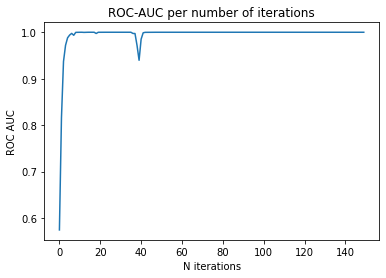

In [117]:
plt.plot(model_raw_vgg19_transformed.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

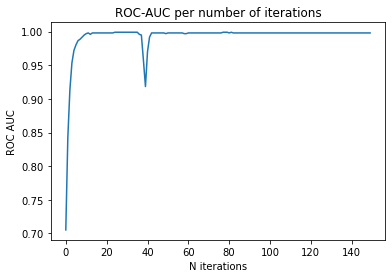

In [118]:
plt.plot(model_raw_vgg19_transformed.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [119]:
log_reg_vgg19_transformed = LogisticRegression(random_state=42)

In [120]:
%%time
log_reg_vgg19_transformed.fit(train_vgg19_transformed, 
                          train_vgg19['target'])

CPU times: user 191 ms, sys: 5.98 ms, total: 197 ms
Wall time: 102 ms


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [121]:
gbr_vgg19_transformed = GradientBoostingClassifier(random_state=42)

In [122]:
%%time
gbr_vgg19_transformed.fit(train_vgg19_transformed, train_vgg19['target'])

CPU times: user 10.1 s, sys: 0 ns, total: 10.1 s
Wall time: 10.2 s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [123]:
rf_vgg19_transformed = RandomForestClassifier(random_state=42)

In [124]:
%%time
rf_vgg19_transformed.fit(train_vgg19_transformed, train_vgg19['target'])

CPU times: user 981 ms, sys: 5.19 ms, total: 986 ms
Wall time: 992 ms


RandomForestClassifier(random_state=42)

## Resnet50 + PCA

### SVC

In [126]:
svc_resnet50_transformed = SVC(random_state=42, probability=True)

In [210]:
%%time
svc_resnet50_transformed.fit(train_resnet50_transformed, train_resnet50['target'])

CPU times: user 2.61 s, sys: 0 ns, total: 2.61 s
Wall time: 2.63 s


SVC(probability=True, random_state=42)

### Dense Net

In [128]:
model_raw_resnet50_transformed = Sequential()
model_raw_resnet50_transformed.add(Dense(12, input_dim=500,
                                  activation='relu'))
model_raw_resnet50_transformed.add(Dense(8, activation='relu'))
model_raw_resnet50_transformed.add(Dense(1, activation='sigmoid'))

In [129]:
model_raw_resnet50_transformed.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                6012      
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 6,125
Trainable params: 6,125
Non-trainable params: 0
_________________________________________________________________


In [130]:
model_raw_resnet50_transformed.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [131]:
%%time
model_raw_resnet50_transformed.fit(train_resnet50_transformed,
                            train_resnet50['target'],
                            epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 2ms/step - loss: 1.6069 - accuracy: 0.7415 - auc: 0.4765
Epoch 2/150
97/97 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.8335 - auc: 0.8205
Epoch 3/150
97/97 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9152 - auc: 0.9310
Epoch 4/150
97/97 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.9452 - auc: 0.9655
Epoch 5/150
97/97 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9607 - auc: 0.9850
Epoch 6/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9710 - auc: 0.9935
Epoch 7/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0712 - accuracy: 0.9772 - auc: 0.9966
Epoch 8/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9793 - auc: 0.9987
Epoch 9/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.98

97/97 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9990 - auc: 1.0000
Epoch 144/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9990 - auc: 1.0000
Epoch 145/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9990 - auc: 1.0000
Epoch 146/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9990 - auc: 1.0000
Epoch 147/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9990 - auc: 1.0000
Epoch 148/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9990 - auc: 1.0000
Epoch 149/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9990 - auc: 1.0000
Epoch 150/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9990 - auc: 1.0000
CPU times: user 44.9 s, sys: 6.25 s, total: 51.1 s
Wall time: 28.3 s


#### Metrics per iteration for Dense Net

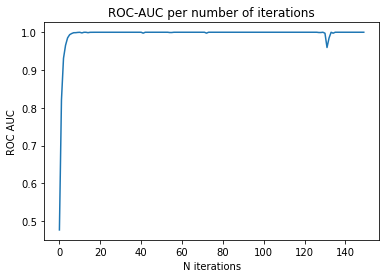

In [132]:
plt.plot(model_raw_resnet50_transformed.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

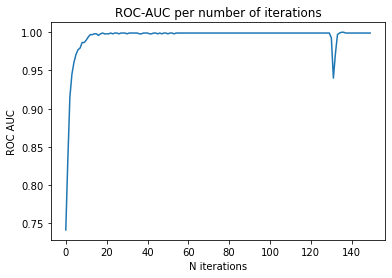

In [133]:
plt.plot(model_raw_resnet50_transformed.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [134]:
log_reg_resnet50_transformed = LogisticRegression(random_state=42)

In [135]:
%%time
log_reg_resnet50_transformed.fit(train_resnet50_transformed, 
                          train_resnet50['target'])

CPU times: user 152 ms, sys: 2.97 ms, total: 155 ms
Wall time: 79.8 ms


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [136]:
gbr_resnet50_transformed = GradientBoostingClassifier(random_state=42)

In [137]:
%%time
gbr_resnet50_transformed.fit(train_resnet50_transformed, train_resnet50['target'])

CPU times: user 10.1 s, sys: 0 ns, total: 10.1 s
Wall time: 10.2 s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [138]:
rf_resnet50_transformed = RandomForestClassifier(random_state=42)

In [139]:
%%time
rf_resnet50_transformed.fit(train_resnet50_transformed, train_resnet50['target'])

CPU times: user 1.03 s, sys: 351 µs, total: 1.03 s
Wall time: 1.05 s


RandomForestClassifier(random_state=42)

## EfficientNet + PCA

### SVC

In [141]:
svc_efficient_net_transformed = SVC(random_state=42, probability=True)

In [142]:
%%time
svc_efficient_net_transformed.fit(train_efficient_net_transformed, train_efficient_net['target'])

CPU times: user 1.8 s, sys: 1.63 ms, total: 1.8 s
Wall time: 1.81 s


SVC(probability=True, random_state=42)

### Dense Net

In [143]:
model_raw_efficient_net_transformed = Sequential()
model_raw_efficient_net_transformed.add(Dense(12, input_dim=500,
                                  activation='relu'))
model_raw_efficient_net_transformed.add(Dense(8, activation='relu'))
model_raw_efficient_net_transformed.add(Dense(1, activation='sigmoid'))

In [144]:
model_raw_efficient_net_transformed.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 12)                6012      
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 6,125
Trainable params: 6,125
Non-trainable params: 0
_________________________________________________________________


In [145]:
model_raw_efficient_net_transformed.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [146]:
%%time
model_raw_efficient_net_transformed.fit(train_efficient_net_transformed,
                            train_efficient_net['target'],
                            epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 1ms/step - loss: 1.5287 - accuracy: 0.4592 - auc: 0.7200
Epoch 2/150
97/97 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8625 - auc: 0.9428
Epoch 3/150
97/97 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9576 - auc: 0.9899
Epoch 4/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9814 - auc: 0.9976
Epoch 5/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9917 - auc: 0.9997
Epoch 6/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9948 - auc: 0.9999
Epoch 7/150
97/97 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9969 - auc: 1.0000
Epoch 8/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9969 - auc: 1.0000
Epoch 9/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.99

Epoch 72/150
97/97 [==============================] - 0s 1ms/step - loss: 3.7279e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 73/150
97/97 [==============================] - 0s 1ms/step - loss: 3.5859e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 74/150
97/97 [==============================] - 0s 1ms/step - loss: 3.4237e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 75/150
97/97 [==============================] - 0s 1ms/step - loss: 3.3066e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 76/150
97/97 [==============================] - 0s 1ms/step - loss: 3.1388e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 77/150
97/97 [==============================] - 0s 1ms/step - loss: 3.0114e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 78/150
97/97 [==============================] - 0s 1ms/step - loss: 2.8774e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 79/150
97/97 [==============================] - 0s 1ms/step - loss: 2.7452e-04 - accuracy: 1.0000 - auc: 1.0000
Epoch 80/150
97/97 [==============================] - 0s

97/97 [==============================] - 0s 2ms/step - loss: 1.2411e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 142/150
97/97 [==============================] - 0s 2ms/step - loss: 1.1814e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 143/150
97/97 [==============================] - 0s 2ms/step - loss: 1.1264e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 144/150
97/97 [==============================] - 0s 2ms/step - loss: 1.0683e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 145/150
97/97 [==============================] - 0s 2ms/step - loss: 1.0203e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 146/150
97/97 [==============================] - 0s 2ms/step - loss: 9.7464e-06 - accuracy: 1.0000 - auc: 1.0000
Epoch 147/150
97/97 [==============================] - 0s 1ms/step - loss: 9.2061e-06 - accuracy: 1.0000 - auc: 1.0000
Epoch 148/150
97/97 [==============================] - 0s 2ms/step - loss: 8.7351e-06 - accuracy: 1.0000 - auc: 1.0000
Epoch 149/150
97/97 [==============================] - 0s 2ms/

#### Metrics per iteration for Dense Net

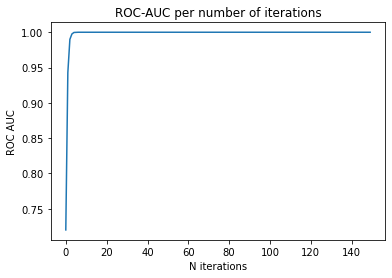

In [147]:
plt.plot(model_raw_efficient_net_transformed.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

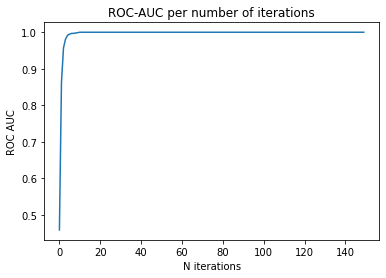

In [148]:
plt.plot(model_raw_efficient_net_transformed.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [149]:
log_reg_efficient_net_transformed = LogisticRegression(random_state=42)

In [150]:
%%time
log_reg_efficient_net_transformed.fit(train_efficient_net_transformed, 
                          train_efficient_net['target'])

CPU times: user 125 ms, sys: 4.83 ms, total: 130 ms
Wall time: 66.8 ms


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [151]:
gbr_efficient_net_transformed = GradientBoostingClassifier(random_state=42)

In [152]:
%%time
gbr_efficient_net_transformed.fit(train_efficient_net_transformed, train_efficient_net['target'])

CPU times: user 14.1 s, sys: 660 µs, total: 14.1 s
Wall time: 14.2 s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [153]:
rf_efficient_net_transformed = RandomForestClassifier(random_state=42)

In [154]:
%%time
rf_efficient_net_transformed.fit(train_efficient_net_transformed, train_efficient_net['target'])

CPU times: user 1.83 s, sys: 0 ns, total: 1.83 s
Wall time: 1.85 s


RandomForestClassifier(random_state=42)

## InceptionV3 + PCA

### SVC

In [155]:
svc_inceptionv3_transformed = SVC(random_state=42, probability=True)

In [156]:
%%time
svc_inceptionv3_transformed.fit(train_inceptionv3_transformed, train_inceptionv3['target'])

CPU times: user 2 s, sys: 0 ns, total: 2 s
Wall time: 2.02 s


SVC(probability=True, random_state=42)

### Dense Net

In [157]:
model_raw_inceptionv3_transformed = Sequential()
model_raw_inceptionv3_transformed.add(Dense(12, input_dim=500,
                                  activation='relu'))
model_raw_inceptionv3_transformed.add(Dense(8, activation='relu'))
model_raw_inceptionv3_transformed.add(Dense(1, activation='sigmoid'))

In [158]:
model_raw_inceptionv3_transformed.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 12)                6012      
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 9         
Total params: 6,125
Trainable params: 6,125
Non-trainable params: 0
_________________________________________________________________


In [159]:
model_raw_inceptionv3_transformed.compile(loss='binary_crossentropy', optimizer='adam',
                        metrics=['accuracy', 'AUC'])

In [160]:
%%time
model_raw_inceptionv3_transformed.fit(train_inceptionv3_transformed,
                            train_inceptionv3['target'],
                            epochs=150, batch_size=10)

Epoch 1/150
97/97 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.7446 - auc: 0.6927
Epoch 2/150
97/97 [==============================] - 0s 3ms/step - loss: 0.2744 - accuracy: 0.8811 - auc: 0.9309
Epoch 3/150
97/97 [==============================] - 0s 3ms/step - loss: 0.1720 - accuracy: 0.9245 - auc: 0.9803
Epoch 4/150
97/97 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9555 - auc: 0.9914
Epoch 5/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9721 - auc: 0.9964
Epoch 6/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9845 - auc: 0.9989
Epoch 7/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9928 - auc: 0.9997
Epoch 8/150
97/97 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9969 - auc: 0.9999
Epoch 9/150
97/97 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.99

97/97 [==============================] - 0s 2ms/step - loss: 1.6824e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 141/150
97/97 [==============================] - 0s 2ms/step - loss: 1.6060e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 142/150
97/97 [==============================] - 0s 2ms/step - loss: 1.5320e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 143/150
97/97 [==============================] - 0s 2ms/step - loss: 1.4617e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 144/150
97/97 [==============================] - 0s 2ms/step - loss: 1.3944e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 145/150
97/97 [==============================] - 0s 2ms/step - loss: 1.3312e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 146/150
97/97 [==============================] - 0s 2ms/step - loss: 1.2706e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 147/150
97/97 [==============================] - 0s 2ms/step - loss: 1.2128e-05 - accuracy: 1.0000 - auc: 1.0000
Epoch 148/150
97/97 [==============================] - 0s 1ms/

#### Metrics per iteration for Dense Net

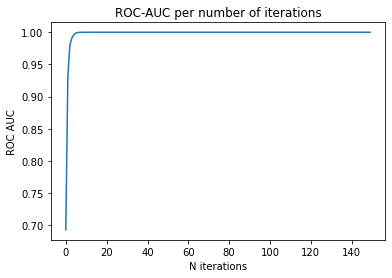

In [161]:
plt.plot(model_raw_inceptionv3_transformed.history.history['auc']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

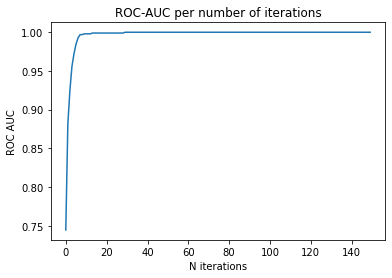

In [162]:
plt.plot(model_raw_inceptionv3_transformed.history.history['accuracy']);
plt.title('ROC-AUC per number of iterations');
plt.xlabel('N iterations');
plt.ylabel('ROC AUC');

### Logistic Regression

In [163]:
log_reg_inceptionv3_transformed = LogisticRegression(random_state=42)

In [164]:
%%time
log_reg_inceptionv3_transformed.fit(train_inceptionv3_transformed, 
                          train_inceptionv3['target'])

CPU times: user 121 ms, sys: 4.03 ms, total: 125 ms
Wall time: 63.5 ms


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

### GradientBoositng

In [165]:
gbr_inceptionv3_transformed = GradientBoostingClassifier(random_state=42)

In [166]:
%%time
gbr_inceptionv3_transformed.fit(train_inceptionv3_transformed, train_inceptionv3['target'])

CPU times: user 13.9 s, sys: 0 ns, total: 13.9 s
Wall time: 14 s


GradientBoostingClassifier(random_state=42)

### RandomForest

In [167]:
rf_inceptionv3_transformed = RandomForestClassifier(random_state=42)

In [168]:
%%time
rf_inceptionv3_transformed.fit(train_inceptionv3_transformed, train_inceptionv3['target'])

CPU times: user 1.83 s, sys: 0 ns, total: 1.83 s
Wall time: 1.85 s


RandomForestClassifier(random_state=42)

# Calculate metrics

In [169]:
train_datasets = (train_vgg16, train_vgg19, train_resnet50, train_efficient_net, 
                 train_inceptionv3)

test_datasets = (test_vgg16, test_vgg19, test_resnet50, test_efficient_net, 
                 test_inceptionv3)


train_datasets_transformed = (train_vgg16_transformed, train_vgg19_transformed, 
                             train_resnet50_transformed, train_efficient_net_transformed,
                             train_inceptionv3_transformed)

test_datasets_transformed = (test_vgg16_transformed, test_vgg19_transformed,
                            test_resnet50_transformed, test_efficient_net_transformed,
                            test_inceptionv3_transformed)

In [197]:
models_vgg16 = (model_raw_vgg16, log_reg, svc, gbr, rf)
models_vgg16_titles = ('Dense Net, VGG16', 'Logistic Regression, VGG16',
                      'SVC, VGG16', 'Gradient Boosting, VGG16',
                      'Random Forest, VGG16')

models_vgg19 = (model_raw_vgg19, log_reg_vgg19, svc_vgg19, gbr_vgg19, rf_vgg19)
models_vgg19_titles = ('Dense Net, VGG19', 'Logistic Regression, VGG19',
                      'SVC, VGG19', 'Gradient Boosting, VGG19',
                      'Random Forest, VGG19')

models_resnet50 = (model_raw_resnet50, log_reg_resnet50, svc_resnet50, gbr_resnet50,
                   rf_resnet50)
models_resnet50_titles = ('Dense Net, Resnet50', 'Logistic Regression, Resnet50',
                          'SVC, Resnet50', 'Gradient Boosting, Resnet50',
                          'Random Forest, Resnet50')

models_efficient_net = (model_raw_efficient_net, log_reg_efficient_net,
                        svc_efficient_net, gbr_efficient_net, rf_efficient_net)
models_efficient_net_titles = ('Dense Net, EfficientNet', 'Logistic Regression, EfficientNet',
                               'SVC, EfficientNet', 'Gradient Boosting, EfficientNet',
                               'Random Forest, EfficientNet')

models_inceptionv3 = (model_raw_inceptionv3, log_reg_inceptionv3,
                        svc_inceptionv3, gbr_inceptionv3, rf_inceptionv3)
models_inceptionv3_titles = ('Dense Net, InceptionV3', 'Logistic Regression, InceptionV3',
                             'SVC, InceptionV3', 'Gradient Boosting, InceptionV3',
                             'Random Forest, InceptionV3')

In [171]:
models_vgg16_transformed = (model_raw_vgg16_transformed, log_reg_vgg16_transformed,
                            svc_vgg16_transformed, gbr_vgg16_transformed, rf_vgg16_transformed)
models_vgg16_titles_transformed = ('Dense Net, VGG16 + PCA', 'Logistic Regression, VGG16 + PCA',
                                   'SVC, VGG16 + PCA', 'Gradient Boosting, VGG16 + PCA',
                                   'Random Forest, VGG16 + PCA')

models_vgg19_transformed = (model_raw_vgg19_transformed, log_reg_vgg19_transformed,
                            svc_vgg19_transformed, gbr_vgg19_transformed,
                            rf_vgg19_transformed)
models_vgg19_titles_transformed = ('Dense Net, VGG19 + PCA', 'Logistic Regression, VGG19 + PCA',
                                   'SVC, VGG19 + PCA', 'Gradient Boosting, VGG19 + PCA',
                                   'Random Forest, VGG19 + PCA')

models_resnet50_transformed = (model_raw_resnet50_transformed, log_reg_resnet50_transformed,
                               svc_resnet50_transformed, gbr_resnet50_transformed,
                               rf_resnet50_transformed)

models_resnet50_titles_transformed = ('Dense Net, Resnet50 + PCA',
                                      'Logistic Regression, Resnet50 + PCA',
                                      'SVC, Resnet50 + PCA', 'Gradient Boosting, Resnet50 + PCA',
                                      'Random Forest, Resnet50 + PCA')

models_efficient_net_transformed = (model_raw_efficient_net_transformed,
                                    log_reg_efficient_net_transformed,
                                    svc_efficient_net_transformed,
                                    gbr_efficient_net_transformed,
                                    rf_efficient_net_transformed)

models_efficient_net_titles_transformed = ('Dense Net, EfficientNet + PCA',
                                           'Logistic Regression, EfficientNet + PCA',
                                           'SVC, EfficientNet + PCA',
                                           'Gradient Boosting, EfficientNet + PCA',
                                           'Random Forest, EfficientNet + PCA')

models_inceptionv3_transformed = (model_raw_inceptionv3_transformed,
                                  log_reg_inceptionv3_transformed,
                                  svc_inceptionv3_transformed,
                                  gbr_inceptionv3_transformed,
                                  rf_inceptionv3_transformed)

models_inceptionv3_titles_transformed = ('Dense Net, InceptionV3 + PCA',
                                         'Logistic Regression, InceptionV3 + PCA',
                                         'SVC, InceptionV3 + PCA',
                                         'Gradient Boosting, InceptionV3 + PCA',
                                         'Random Forest, InceptionV3 + PCA')

In [173]:
all_models_titles = models_vgg16_titles+models_vgg19_titles+models_resnet50_titles+\
models_efficient_net_titles + models_inceptionv3_titles

all_models_titles_transformed = models_vgg16_titles_transformed+\
models_vgg19_titles_transformed+models_resnet50_titles_transformed+\
models_efficient_net_titles_transformed + models_inceptionv3_titles_transformed

all_models_titles_final = all_models_titles + all_models_titles_transformed

In [174]:
len(all_models_titles_final)

50

In [175]:
index_metrics = pd.MultiIndex.from_product((all_models_titles_final, ('train', 'test')))
columns_metrics = ['Accuracy', 'AUC', 'F1', 'Recall', 'Precision']

In [177]:
metrics_functions = (accuracy_score, roc_auc_score, f1_score, recall_score, precision_score)

In [225]:
metrics_df = pd.DataFrame(index=index_metrics, columns=columns_metrics)

In [202]:
def calculate_models_metrics(metrics_df, train_data, test_data, models, models_titles,
                            metrics=metrics_functions, metrics_titles=columns_metrics):
    for model, title in zip(models, models_titles):
        for metric, metric_title in zip(metrics, metrics_titles):
            try:
                metrics_df.loc[(title, 'train'), metric_title] = metric(
                    train_data['target'], model.predict(train_data[train_data.columns[2:]]))

                metrics_df.loc[(title, 'test'), metric_title] = metric(
                    test_data['target'], model.predict(test_data[test_data.columns[2:]]))
            except ValueError:
                metrics_df.loc[(title, 'train'), metric_title] = metric(
                    train_data['target'], 
                    model.predict(train_data[train_data.columns[2:]]).flatten() > 0.5)

                metrics_df.loc[(title, 'test'), metric_title] = metric(
                    test_data['target'], 
                    model.predict(test_data[test_data.columns[2:]]).flatten() > 0.5)
                
    return metrics_df


def calculate_models_metrics_transformed(metrics_df, train_data, test_data, train_target,test_target,
                                         models, models_titles,
                                         metrics=metrics_functions,
                                         metrics_titles=columns_metrics):
    for model, title in zip(models, models_titles):
        for metric, metric_title in zip(metrics, metrics_titles):
            try:
                metrics_df.loc[(title, 'train'), metric_title] = metric(
                    train_target, model.predict(train_data))

                metrics_df.loc[(title, 'test'), metric_title] = metric(
                    test_target, model.predict(test_data))
            except ValueError:
                metrics_df.loc[(title, 'train'), metric_title] = metric(
                    train_target, 
                    model.predict(train_data).flatten() > 0.5)

                metrics_df.loc[(title, 'test'), metric_title] = metric(
                    test_target, 
                    model.predict(test_data).flatten() > 0.5)
                
    return metrics_df

In [226]:
metrics_df = calculate_models_metrics(metrics_df, train_vgg16, test_vgg16, models_vgg16,
                                     models_vgg16_titles)

In [227]:
metrics_df = calculate_models_metrics(metrics_df, train_vgg19, test_vgg19, models_vgg19,
                                     models_vgg19_titles)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
metrics_df = calculate_models_metrics(metrics_df, train_resnet50, test_resnet50, models_resnet50,
                                     models_resnet50_titles)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [229]:
metrics_df = calculate_models_metrics(metrics_df, train_efficient_net,
                                      test_efficient_net, models_efficient_net,
                                     models_efficient_net_titles)

In [230]:
metrics_df = calculate_models_metrics(metrics_df, train_inceptionv3,
                                      test_inceptionv3, models_inceptionv3,
                                     models_inceptionv3_titles)

In [231]:
metrics_df = calculate_models_metrics_transformed(metrics_df, train_vgg16_transformed,
                                                  test_vgg16_transformed, train_vgg16['target'],
                                                  test_vgg16['target'],
                                                  models_vgg16_transformed,
                                                  models_vgg16_titles_transformed)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
metrics_df = calculate_models_metrics_transformed(metrics_df, train_vgg19_transformed,
                                      test_vgg19_transformed,train_vgg19['target'],
                                     test_vgg19['target'], models_vgg19_transformed,
                                     models_vgg19_titles_transformed)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [233]:
metrics_df = calculate_models_metrics_transformed(metrics_df, train_resnet50_transformed,
                                      test_resnet50_transformed, train_resnet50['target'],
                                      test_resnet50['target'], models_resnet50_transformed,
                                     models_resnet50_titles_transformed)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [234]:
metrics_df = calculate_models_metrics_transformed(metrics_df, train_inceptionv3_transformed,
                                      test_inceptionv3_transformed,
                                      train_inceptionv3['target'],
                                      test_inceptionv3['target'],
                                      models_inceptionv3_transformed,
                                     models_inceptionv3_titles_transformed)

In [235]:
metrics_df = calculate_models_metrics_transformed(metrics_df, train_efficient_net_transformed,
                                      test_efficient_net_transformed,
                                      train_efficient_net['target'],
                                      test_efficient_net['target'],
                                      models_efficient_net_transformed,
                                     models_efficient_net_titles_transformed)

In [236]:
metrics_df.head()

Accuracy       AUC        F1    Recall  \
Dense Net, VGG16           train  0.973113  0.986961  0.941964         1   
                           test   0.809639  0.655504  0.324786  0.211111   
Logistic Regression, VGG16 train         1         1         1         1   
                           test   0.816867   0.60188  0.344828  0.222222   
SVC, VGG16                 train  0.892451  0.753555  0.672956  0.507109   

                                 Precision  
Dense Net, VGG16           train  0.890295  
                           test   0.703704  
Logistic Regression, VGG16 train         1  
                           test   0.769231  
SVC, VGG16                 train         1

In [237]:
pd.set_option('display.max.rows', None)

In [238]:
metrics_df

Accuracy       AUC         F1  \
Dense Net, VGG16                        train  0.973113  0.986961   0.941964   
                                        test   0.809639  0.655504   0.324786   
Logistic Regression, VGG16              train         1         1          1   
                                        test   0.816867   0.60188   0.344828   
SVC, VGG16                              train  0.892451  0.753555   0.672956   
                                        test   0.785542  0.505556   0.021978   
Gradient Boosting, VGG16                train  0.980352  0.954976   0.952854   
                                        test   0.812048  0.582735   0.290909   
Random Forest, VGG16                    train         1         1          1   
                                        test   0.792771  0.522222  0.0851064   
Dense Net, VGG19                        train  0.995863  0.999837   0.990431   
                                        test   0.795181  0.489641   0.205607   
Logistic Regression, VGG19              train         1         1          1   
                                        test   0.807229  0.603761   0.354839   
SVC, VGG19                              train  0.885212  0.736967   0.643087   
                                        test   0.783133       0.5          0   
Gradient Boosting, VGG19                train  0.988625  0.973934   0.973236   
                                        test   0.783133  0.520085        0.1   
Random Forest, VGG19                    train         1         1          1   
                                        test   0.787952  0.515128  0.0638298   
Dense Net, Resnet50                     train  0.998966  0.999342   0.997636   
                                        test   0.792771  0.684838   0.203704   
Logistic Regression, Resnet50           train         1         1          1   
                                        test   0.790361  0.556838   0.230088   
SVC, Resnet50                           train  0.913133  0.800948   0.751479   
                                        test   0.783133       0.5          0   
Gradient Boosting, Resnet50             train         1         1          1   
                                        test   0.790361  0.528718   0.121212   
Random Forest, Resnet50                 train         1         1          1   
                                        test   0.783133  0.508034  0.0425532   
Dense Net, EfficientNet                 train         1         1          1   
                                        test   0.983133  0.998701       0.96   
Logistic Regression, EfficientNet       train         1         1          1   
                                        test   0.987952  0.976239   0.971751   
SVC, EfficientNet                       train  0.997932  0.995261   0.995238   
                                        test   0.971084   0.93735   0.929412   
Gradient Boosting, EfficientNet         train         1         1          1   
                                        test   0.973494  0.954957   0.937853   
Random Forest, EfficientNet             train         1         1          1   
                                        test   0.963855  0.916667   0.909091   
Dense Net, InceptionV3                  train         1         1          1   
                                        test   0.966265  0.989607   0.922222   
Logistic Regression, InceptionV3        train         1         1          1   
                                        test   0.966265  0.950342   0.922222   
SVC, InceptionV3                        train  0.986556  0.969194   0.968215   
                                        test   0.956627  0.904017   0.890244   
Gradient Boosting, InceptionV3          train         1         1          1   
                                        test   0.946988  0.897863   0.869048   
Random Forest, InceptionV3              train         1         1          1   
                                        test   

In [ ]:
metrics_df.to_csv('all_metrics_lab3_additional.csv', index=True)